In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# 读取Excel文件，确保你的文件路径正确
file_path = '../data/Stock_Tesla_5Years.xlsx'
df = pd.read_excel(file_path)

# 确保日期列被解析为日期格式
df['Date'] = pd.to_datetime(df.iloc[:, 0])

# 按日期降序排列数据框，以获取最新的记录
df.sort_values('Date', ascending=False, inplace=True)

# 选择最近30天的数据
recent_df = df.head(30).copy()

# 将数据按日期升序重新排序以便于绘图
recent_df.sort_values('Date', ascending=True, inplace=True)

# 显示最近30天的数据
print(recent_df)


         Date   Close     Volume    Open    High     Low
29 2024-10-07  240.83   68113270  249.00  249.83  240.70
28 2024-10-08  244.50   56303160  243.56  246.21  240.56
27 2024-10-09  241.05   66289530  243.82  247.43  239.51
26 2024-10-10  238.77   83087060  241.81  242.79  232.34
25 2024-10-11  217.80  142628900  220.13  223.34  214.38
24 2024-10-14  219.16   86291920  220.13  221.91  213.74
23 2024-10-15  219.57   62988790  220.01  224.26  217.12
22 2024-10-16  221.33   49632820  221.40  222.82  218.93
21 2024-10-17  220.89   50791780  221.59  222.08  217.90
20 2024-10-18  220.70   49611870  220.71  222.28  219.23
19 2024-10-21  218.85   47328990  218.90  220.48  215.73
18 2024-10-22  217.97   43268740  217.31  218.22  215.26
17 2024-10-23  213.65   80938890  217.13  218.72  212.11
16 2024-10-24  260.48  204491900  244.68  262.12  242.65
15 2024-10-25  269.19  161611900  256.01  269.49  255.32
14 2024-10-28  262.51  107653600  270.00  273.54  262.24
13 2024-10-29  259.52   8052175

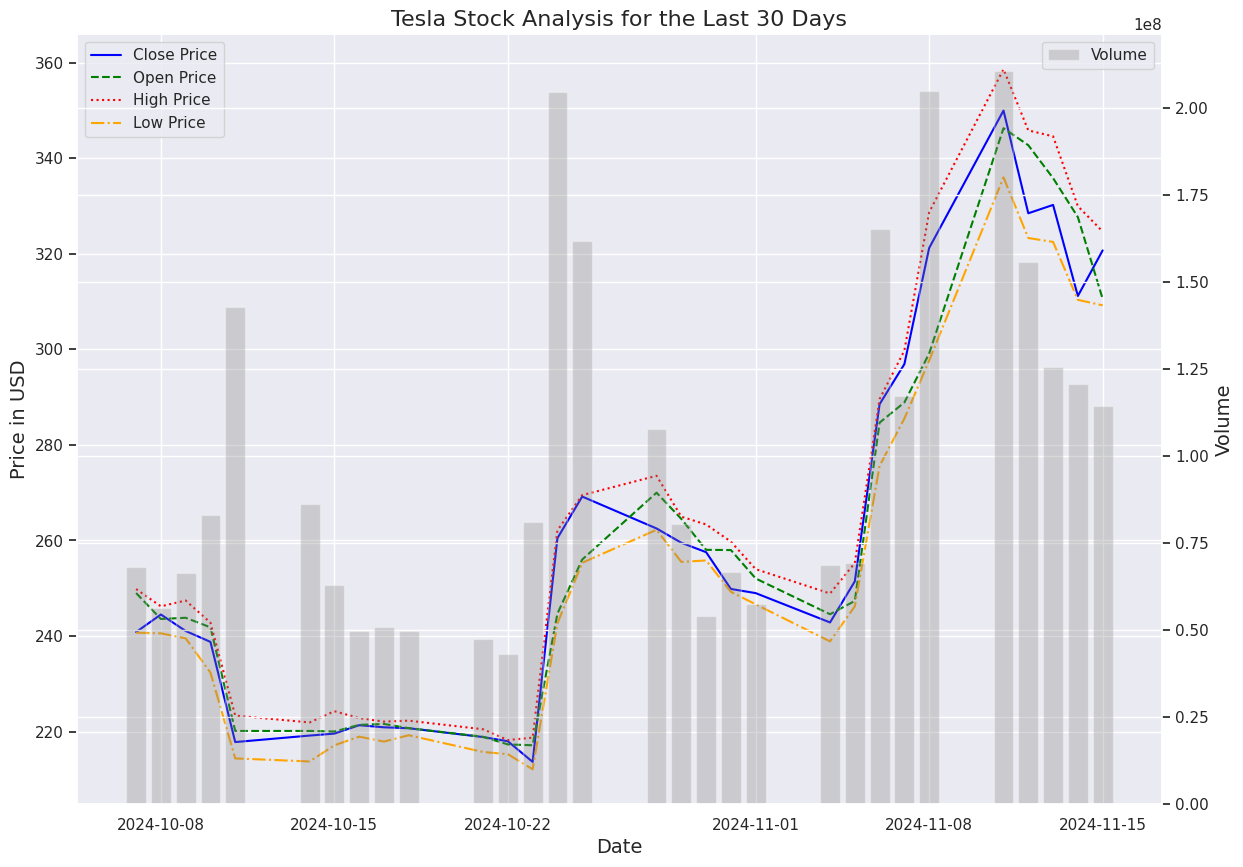

In [9]:
# 设置Seaborn样式
sns.set_theme(style="darkgrid")

# 创建一个图表和轴对象
fig, ax = plt.subplots(figsize=(14, 10))

# 绘制收盘价
ax.plot(recent_df['Date'], recent_df.iloc[:, 1], label='Close Price', color='blue')

# 绘制成交量（用柱状图表示）
ax2 = ax.twinx()  # 创建共享x轴的第二个y轴
ax2.bar(recent_df['Date'], recent_df.iloc[:, 2], color='gray', alpha=0.3, label='Volume')

# 绘制开盘价、最高值和最低值
ax.plot(recent_df['Date'], recent_df.iloc[:, 3], label='Open Price', linestyle='--', color='green')
ax.plot(recent_df['Date'], recent_df.iloc[:, 4], label='High Price', linestyle=':', color='red')
ax.plot(recent_df['Date'], recent_df.iloc[:, 5], label='Low Price', linestyle='-.', color='orange')

# 添加标题和标签
ax.set_title('Tesla Stock Analysis for the Last 30 Days', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price in USD', fontsize=14)
ax2.set_ylabel('Volume', fontsize=14)

# 显示图例
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# 显示图表
plt.show()
